In [251]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#read data from csv file
df = pd.read_csv("drUpdatedFile - drsummiya.csv")

sns.set_style("whitegrid")
# Imports needed for the script
import numpy as np
import pandas as pd
import re
#import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.tools as tls

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [252]:
df.columns

Index(['Age', 'Gender', 'Location', 'Marital Status',
       'Presence Psychiatric disorder', 'Stay', 'Treatment',
       'Previous_Attempts', 'Source', 'Expired', 'Intake', 'Education'],
      dtype='object')

In [253]:
df['Education'] = df['Education'].str.capitalize()

In [254]:
#df.rename(columns = {'Target':'Intake'},inplace = True)

In [255]:
#df.rename(columns = {'EducationAll':'Education'},inplace = True)

In [256]:
#ax =  sns.catplot(x="EducationAll", y="Age",hue="Intake", kind="swarm", col="Location",height=4.5, aspect=.8, data=df )
#ax.add_legend(title='Severity')
#ax.set_axis_labels("", "Age")
#axes = ax.axes.flatten()
#axes[0].set_title("Rural")
#axes[1].set_title("Urban")
#plt.savefig('images/Education.eps', format='eps')

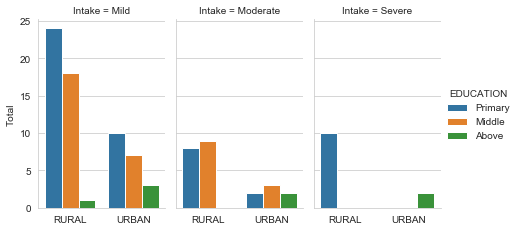

In [257]:
g = sns.catplot("Location", col="Intake",hue="Education", col_wrap=3.5,data=df,kind="count", height=3.5, aspect=.5)
g.set_axis_labels("", "Total")
g._legend.set_title('EDUCATION')
plt.savefig('images/Education.eps', format='eps')

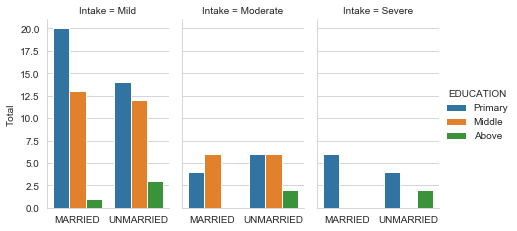

In [258]:
g = sns.catplot("Marital Status", col="Intake",hue="Education", col_wrap=3.5,data=df,kind="count", height=3.5, aspect=.5)
g.set_axis_labels("", "Total")
g._legend.set_title('EDUCATION')
plt.savefig('images/ms.eps', format='eps')

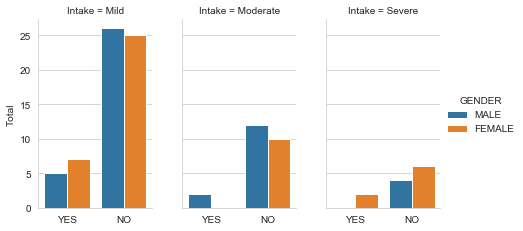

In [221]:
g = sns.catplot("Presence Psychiatric disorder", col="Intake",hue="Gender", col_wrap=3.5,data=df,kind="count", height=3.5, aspect=.5)
g.set_axis_labels("", "Total")
g._legend.set_title('GENDER')
plt.savefig('images/disorder.eps', format='eps')

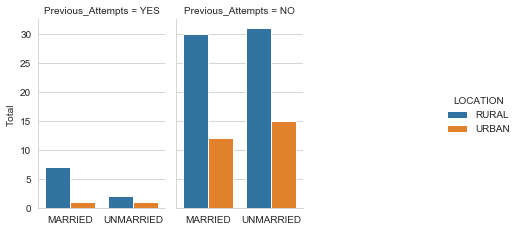

In [222]:
g = sns.catplot("Marital Status", col="Previous_Attempts",hue="Location", col_wrap=3.5,data=df,kind="count", height=3.5, aspect=.5)
g.set_axis_labels("", "Total")
g._legend.set_title('LOCATION')
plt.savefig('images/pa.eps', format='eps')

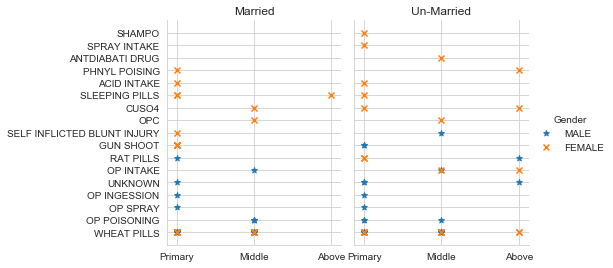

In [223]:


ax = sns.FacetGrid(df, col="Marital Status",  hue='Gender', height=4,  hue_kws={"marker": ['*','x']} )
ax.map(plt.scatter, "Education", "Source")
ax.add_legend()
ax.set_axis_labels("", "")
axes = ax.axes.flatten()
axes[0].set_title("Married")
axes[1].set_title("Un-Married")
plt.savefig('images/sources.eps', format='eps')


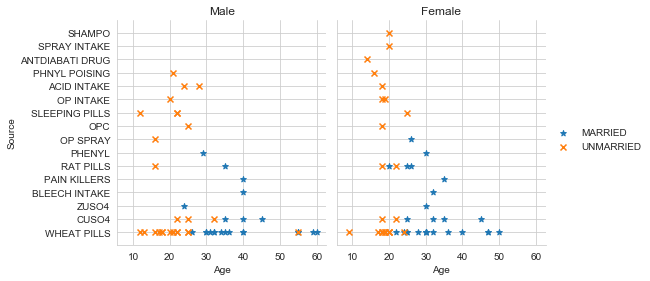

In [224]:
ax = sns.FacetGrid(df, col="Gender", hue='Marital Status', height=4,  hue_kws={"marker": ['*','x']} )
ax.map(plt.scatter, "Age", "Source")
ax.add_legend(title='')
#ax.set_axis_labels("Education", "Age")
axes = ax.axes.flatten()
axes[0].set_title("Male")
axes[1].set_title("Female")
plt.savefig('images/ageFactor.eps', format='eps')

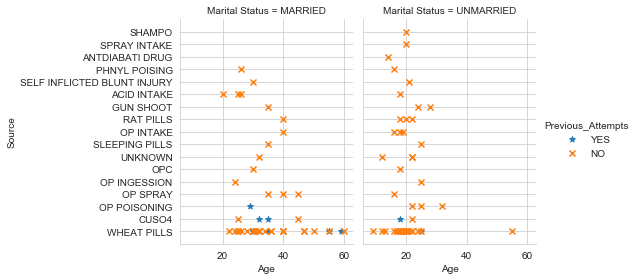

In [225]:


ax = sns.FacetGrid(df, col="Marital Status", hue='Previous_Attempts', height=4,  hue_kws={"marker": ['*','x']} )
ax.map(plt.scatter, "Age", "Source")
ax.add_legend()

plt.savefig('images/preAttempts.eps', format='eps')

In [226]:
df.columns

Index(['Age', 'Gender', 'Location', 'Marital Status',
       'Presence Psychiatric disorder', 'Stay', 'Treatment',
       'Previous_Attempts', 'Source', 'Expired', 'Intake', 'Education'],
      dtype='object')

In [227]:


def processCategories(df):
    dummyEducation = pd.get_dummies(df['Education'], prefix='ed', drop_first=True)
    dummyGender    = pd.get_dummies(df['Gender'], prefix='gen', drop_first=True)
    dummyLocation  = pd.get_dummies(df['Location'], prefix='loc', drop_first=True)
    dummyMaritalStatus = pd.get_dummies(df['Marital Status'], prefix='ms', drop_first=True)
    dummyPresencePsychiatricDisorder = pd.get_dummies(df['Presence Psychiatric disorder'], prefix='ppd', drop_first=True)
    #dummyPreviousAttempts = pd.get_dummies(df['Previous Attempts'], prefix='pa', drop_first=True)
    df.drop(['Gender', 'Location', 'Marital Status',
       'Presence Psychiatric disorder', 'Stay', 'Treatment',
        'Source', 'Expired', 'Education','Intake'], axis=1, inplace=True)
    return pd.concat([df,dummyEducation,dummyGender,dummyLocation,dummyMaritalStatus,dummyPresencePsychiatricDisorder], axis=1)



In [228]:
final = processCategories(df)

In [229]:
final

,Age,Previous_Attempts,ed_Middle,ed_Primary,gen_MALE,loc_URBAN,ms_UNMARRIED,ppd_YES
0,30,YES,0,1,1,0,0,1
1,18,NO,1,0,0,0,1,1
2,18,NO,0,1,1,0,1,0
3,12,NO,0,1,1,1,1,0
4,32,NO,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...
94,36,NO,0,1,0,0,0,0
95,26,NO,0,1,0,0,0,0
96,50,NO,0,1,0,0,0,0
97,24,NO,0,1,0,1,0,0


In [230]:
X = final.drop('Previous_Attempts',axis='columns')

In [231]:
y = final.Previous_Attempts

In [232]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 70% training and 30% test

In [234]:
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [241]:


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)



In [242]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [243]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

In [244]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [245]:


gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)



In [246]:
gaussian

GaussianNB(priors=None, var_smoothing=1e-09)

In [238]:
perceptron = Perceptron(max_iter=100)
perceptron.fit(X_train, y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)

In [239]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
             'Naive Bayes', 'Perceptron'],
    'Score': [acc_knn, acc_log, 
              acc_gaussian, acc_perceptron]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
91.30,KNN
91.30,Naive Bayes
88.41,Logistic Regression
88.41,Perceptron


In [248]:
# Decision tree with depth = 3
dt3 = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
dt3.fit(X_train, y_train)
dt3_score_train = dt3.score(X_train, y_train)
print("Training score: ",dt3_score_train)
dt3_score_test = dt3.score(X_test, y_test)
print("Testing score: ",dt3_score_test)

Training score:  0.927536231884058
Testing score:  0.9


In [249]:
dt3

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')